In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
match=pd.read_csv("ipl_win.csv")
delivery=pd.read_csv("delivery.csv")

In [3]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [4]:
match.shape

(577, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
delivery.groupby(["match_id","inning"]).sum()["total_runs"]

match_id  inning
1         1         222
          2          82
2         1         240
          2         207
3         1         129
                   ... 
575       2         140
576       1         162
          2         163
577       1         208
          2         200
Name: total_runs, Length: 1164, dtype: int64

 here we can describe each inning ,this show us  how much run goes in first inning and 2nd inning to

In [7]:
total_score_df=delivery.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()

In [8]:
total_score_df

,match_id,inning,total_runs
0,1,1,222
1,1,2,82
2,2,1,240
3,2,2,207
4,3,1,129
...,...,...,...
1159,575,2,140
1160,576,1,162
1161,576,2,163
1162,577,1,208


In [9]:
# here we manage the second inning with the help of this method
total_score_df=total_score_df[total_score_df["inning"]==1]

In [10]:
total_score_df

,match_id,inning,total_runs
0,1,1,222
2,2,1,240
4,3,1,129
6,4,1,165
8,5,1,110
...,...,...,...
1154,573,1,138
1156,574,1,158
1158,575,1,162
1160,576,1,162


# now merge the both dataframe where common is id in df and match id in total_score_df

In [11]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on="id",right_on="match_id")

In [12]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,222
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,2,240
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,3,129
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,4,165
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,5,110


In [13]:
match_df["team1"].unique()# with the help we can find how much teams are played

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [14]:
# now remove the some teams and replace some teams whic is not present this time
teams=[
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Daredevils'
]

In [15]:
match_df["team1"]=match_df["team1"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
match_df["team2"]=match_df["team2"].str.replace("Deccan Chargers","Sunrisers Hyderabad")

In [16]:
#remove all temas which is not mentioned in teams section
match_df=match_df[match_df["team1"].isin(teams)]
match_df=match_df[match_df["team2"].isin(teams)]

In [17]:
match_df.shape

(490, 20)

In [18]:
match_df['dl_applied'].value_counts()

0    479
1     11
Name: dl_applied, dtype: int64

there is 11 match which is affected by rain

In [19]:
#here we remove the dl_applied match
match_df=match_df[match_df['dl_applied']==0]

In [20]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,222
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,2,240
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,3,129
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,4,165
4,5,2008,Kolkata,2008-04-20,Sunrisers Hyderabad,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,5,110


In [21]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [22]:
match_df

,match_id,city,winner,total_runs
0,1,Bangalore,Kolkata Knight Riders,222
1,2,Chandigarh,Chennai Super Kings,240
2,3,Delhi,Delhi Daredevils,129
3,4,Mumbai,Royal Challengers Bangalore,165
4,5,Kolkata,Kolkata Knight Riders,110
...,...,...,...,...
568,569,Raipur,Delhi Daredevils,158
571,572,Kolkata,Kolkata Knight Riders,171
572,573,Raipur,Royal Challengers Bangalore,138
574,575,Delhi,Sunrisers Hyderabad,162


In [23]:
#now we merge the match_df data with delivery
match_df.merge(delivery,on="match_id")

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114440,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,0,0,0,0,2,0,2,NaN,NaN,NaN
114441,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
114442,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,0,1,0,0,0,1,1,NaN,NaN,NaN
114443,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [24]:
delivery_df=match_df.merge(delivery,on="match_id")

In [25]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114440,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,0,0,0,0,2,0,2,NaN,NaN,NaN
114441,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
114442,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,0,1,0,0,0,1,1,NaN,NaN,NaN
114443,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [26]:
delivery_df=delivery_df[delivery_df["inning"]==2]#here we want 2nd innigs 

In [27]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,0,0,0,0,1,0,1,NaN,NaN,NaN
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,0,0,0,0,0,1,1,NaN,NaN,NaN
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,0,0,0,0,1,0,1,NaN,NaN,NaN
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114440,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,0,0,0,0,2,0,2,NaN,NaN,NaN
114441,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
114442,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,0,1,0,0,0,1,1,NaN,NaN,NaN
114443,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [28]:
#agian we take group by
delivery_df.groupby("match_id").cumsum()["total_runs_y"]

124         1
125         2
126         2
127         3
128         4
         ... 
114440    194
114441    194
114442    195
114443    196
114444    200
Name: total_runs_y, Length: 55384, dtype: int64

In [29]:
#here now create a new collumn in last
delivery_df["current_score"]=delivery_df.groupby("match_id").cumsum()["total_runs_y"]

In [30]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,0,0,0,1,0,1,NaN,NaN,NaN,1
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,0,0,0,0,1,1,NaN,NaN,NaN,2
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,0,0,0,0,NaN,NaN,NaN,2
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,0,0,0,1,0,1,NaN,NaN,NaN,3
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,0,0,0,1,0,1,NaN,NaN,NaN,4


In [31]:
#now we find runs left
delivery_df["runs_left"]=delivery_df['total_runs_x'] - delivery_df['current_score']

In [32]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,0,0,1,0,1,NaN,NaN,NaN,1,221
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,0,0,0,1,1,NaN,NaN,NaN,2,220
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,0,0,0,NaN,NaN,NaN,2,220
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,0,0,1,0,1,NaN,NaN,NaN,3,219
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,0,0,1,0,1,NaN,NaN,NaN,4,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114440,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,0,0,2,0,2,NaN,NaN,NaN,194,14
114441,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,0,0,CJ Jordan,run out,NV Ojha,194,14
114442,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,0,0,0,1,1,NaN,NaN,NaN,195,13
114443,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,0,0,1,0,1,NaN,NaN,NaN,196,12


In [33]:
#balls left
delivery_df["balls_left"]=126-(delivery_df["over"]*6 + delivery_df['ball'])

In [34]:
delivery_df.head(10)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,0,1,0,1,NaN,NaN,NaN,1,221,119
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,0,0,1,1,NaN,NaN,NaN,2,220,118
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,0,0,NaN,NaN,NaN,2,220,117
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,0,1,0,1,NaN,NaN,NaN,3,219,116
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,0,1,0,1,NaN,NaN,NaN,4,218,115
129,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,6,W Jaffer,...,0,0,0,0,NaN,NaN,NaN,4,218,114
130,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,7,W Jaffer,...,0,0,0,0,NaN,NaN,NaN,4,218,113
131,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,1,R Dravid,...,0,0,0,0,R Dravid,bowled,NaN,4,218,113
132,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,2,V Kohli,...,0,0,0,0,NaN,NaN,NaN,4,218,112
133,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,3,V Kohli,...,0,0,4,4,NaN,NaN,NaN,8,214,111


In [35]:
delivery_df["player_dismissed"]=delivery_df['player_dismissed'].fillna(0)
delivery_df["player_dismissed"]=delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df["player_dismissed"]=delivery_df['player_dismissed'].astype("int")

In [36]:
wickets=delivery_df.groupby("match_id").cumsum()['player_dismissed'].values
delivery_df["wickets"]=10-wickets

In [37]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,1,0,1,1,NaN,NaN,1,221,119,9
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,0,1,1,1,NaN,NaN,2,220,118,8
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,0,1,NaN,NaN,2,220,117,7
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,1,0,1,1,NaN,NaN,3,219,116,6
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,1,0,1,1,NaN,NaN,4,218,115,5


In [38]:
#crr=runs/overs(current run rate)
delivery_df['crr']=(delivery_df["current_score"]*6)/(120- delivery_df["balls_left"])

In [39]:
#rrr(required run rate)
delivery_df["rrr"]=(delivery_df['runs_left']*6)/delivery_df['balls_left']

In [40]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,1,1,NaN,NaN,1,221,119,9,6.000000,11.142857
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,1,1,NaN,NaN,2,220,118,8,6.000000,11.186441
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,1,NaN,NaN,2,220,117,7,4.000000,11.282051
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,1,1,NaN,NaN,3,219,116,6,4.500000,11.327586
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,1,1,NaN,NaN,4,218,115,5,4.800000,11.373913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114440,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,2,1,NaN,NaN,194,14,4,-110,10.034483,21.000000
114441,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,1,run out,NV Ojha,194,14,3,-111,9.948718,28.000000
114442,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,1,1,NaN,NaN,195,13,2,-112,9.915254,39.000000
114443,577,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,1,1,NaN,NaN,196,12,1,-113,9.882353,72.000000


In [41]:
#craete a function
def result(row):
    return 1 if row['batting_team']==row["winner"] else 0

In [42]:
delivery_df['results'] = delivery_df.apply(result,axis=1)


In [43]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,results
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,1,NaN,NaN,1,221,119,9,6.0,11.142857,0
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,1,NaN,NaN,2,220,118,8,6.0,11.186441,0
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,1,NaN,NaN,2,220,117,7,4.0,11.282051,0
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,1,NaN,NaN,3,219,116,6,4.5,11.327586,0
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,1,NaN,NaN,4,218,115,5,4.8,11.373913,0


In [44]:
final_df=delivery_df[['batting_team',"bowling_team","city","runs_left","balls_left",'wickets',"crr","rrr",'results']] 

In [45]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,results
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,119,9,6.000000,11.142857,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,118,8,6.000000,11.186441,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,117,7,4.000000,11.282051,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,116,6,4.500000,11.327586,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,218,115,5,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...
114440,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,14,4,-110,10.034483,21.000000,0
114441,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,14,3,-111,9.948718,28.000000,0
114442,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,13,2,-112,9.915254,39.000000,0
114443,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,12,1,-113,9.882353,72.000000,0


#keep the imporatnt data


In [46]:
final_df=final_df.sample(final_df.shape[0])
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,results
16700,Royal Challengers Bangalore,Kolkata Knight Riders,Durban,93,82,-33,7.263158,6.804878,1


In [47]:
#check the nan value
final_df.describe()

,runs_left,balls_left,wickets,crr,rrr,results
count,55384.000000,55384.000000,55384.000000,55384.000000,5.537800e+04,55384.000000
mean,91.053012,62.787773,-49.211794,7.197933,NaN,0.520927
std,49.087642,33.358373,34.467872,2.181663,NaN,0.499566
min,-6.000000,-2.000000,-124.000000,0.000000,-inf,0.000000
25%,52.000000,35.000000,-78.000000,6.058252,7.008850e+00,0.000000
50%,91.000000,64.000000,-49.000000,7.250000,8.733003e+00,1.000000
75%,128.000000,92.000000,-20.000000,8.368421,1.075862e+01,1.000000
max,246.000000,119.000000,9.000000,36.000000,inf,1.000000


#we can see here there are some nan value and inft too so remove it and manage the data 


In [48]:
final_df=final_df[final_df["balls_left"]!=0]

In [49]:
final_df.dropna(inplace=True)

In [50]:
final_df.describe()

,runs_left,balls_left,wickets,crr,rrr,results
count,54368.000000,54368.000000,54368.000000,54368.000000,54368.000000,54368.000000
mean,91.429812,63.017676,-48.979676,7.205443,10.267902,0.521796
std,49.029843,33.208780,34.317958,2.186776,13.952424,0.499529
min,-6.000000,-2.000000,-123.000000,0.000000,-510.000000,0.000000
25%,53.000000,35.000000,-78.000000,6.068966,7.021277,0.000000
50%,91.000000,64.000000,-48.000000,7.258662,8.734177,1.000000
75%,128.000000,92.000000,-19.000000,8.379310,10.744186,1.000000
max,246.000000,119.000000,9.000000,36.000000,582.000000,1.000000


now we get perfect value,,,,lets work on it

# model_building

# create tran_test_split

In [51]:
#first up all create x and y value
x=final_df.iloc[:,:-1]#except last one and take all value
y=final_df.iloc[:,-1]# only last one 

In [52]:
x

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr
45723,Rajasthan Royals,Mumbai Indians,Jaipur,87,104,-6,2.625000,5.019231
60083,Royal Challengers Bangalore,Deccan Chargers,Bangalore,135,81,-29,7.076923,10.000000
108625,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,64,50,-63,6.685714,7.680000
57867,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,189,118,8,3.000000,9.610169
15258,Mumbai Indians,Deccan Chargers,Durban,95,69,-47,8.588235,8.260870
...,...,...,...,...,...,...,...,...
95333,Mumbai Indians,Kings XI Punjab,Mumbai,155,81,-30,3.384615,11.481481
71924,Royal Challengers Bangalore,Mumbai Indians,Mumbai,164,91,-19,6.206897,10.813187
107397,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,178,89,-22,9.483871,12.000000
16262,Kolkata Knight Riders,Mumbai Indians,Port Elizabeth,117,60,-53,7.000000,11.700000


In [53]:
y

45723     1
60083     1
108625    1
57867     0
15258     0
         ..
95333     0
71924     0
107397    0
16262     0
45330     1
Name: results, Length: 54368, dtype: int64

In [54]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)


In [55]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,results
45723,Rajasthan Royals,Mumbai Indians,Jaipur,87,104,-6,2.625000,5.019231,1
60083,Royal Challengers Bangalore,Deccan Chargers,Bangalore,135,81,-29,7.076923,10.000000,1
108625,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,64,50,-63,6.685714,7.680000,1
57867,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,189,118,8,3.000000,9.610169,0
15258,Mumbai Indians,Deccan Chargers,Durban,95,69,-47,8.588235,8.260870,0


#we can see this there are some value which is in string 

# ColumnTransformer and onehotEncoderr

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([
    ("trf",OneHotEncoder(sparse=False),['batting_team',"bowling_team",'city'])
],remainder="passthrough")

# LogisticRegression ,RandomForestClassifier and Pipeline

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [58]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))])

In [59]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

# accuracy score

In [60]:
y_pred=pipe.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8101088875809299

In [62]:
pipe.predict_proba(x_test)[10]

array([0.5359628, 0.4640372])

In [63]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [64]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [65]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 143


,end_of_over,runs_after_over,wickets_in_over,lose,win
16422,1,6,6,5.4,94.6
16430,2,5,8,7.0,93.0
16437,3,9,7,5.8,94.2
16443,4,1,6,10.3,89.7
16449,5,10,6,8.2,91.8
16455,6,2,6,12.6,87.4
16461,7,3,6,17.4,82.6
16467,8,9,6,15.5,84.5
16475,9,11,8,12.3,87.7
16481,10,4,6,15.9,84.1


Text(0.5, 1.0, 'Target-143')

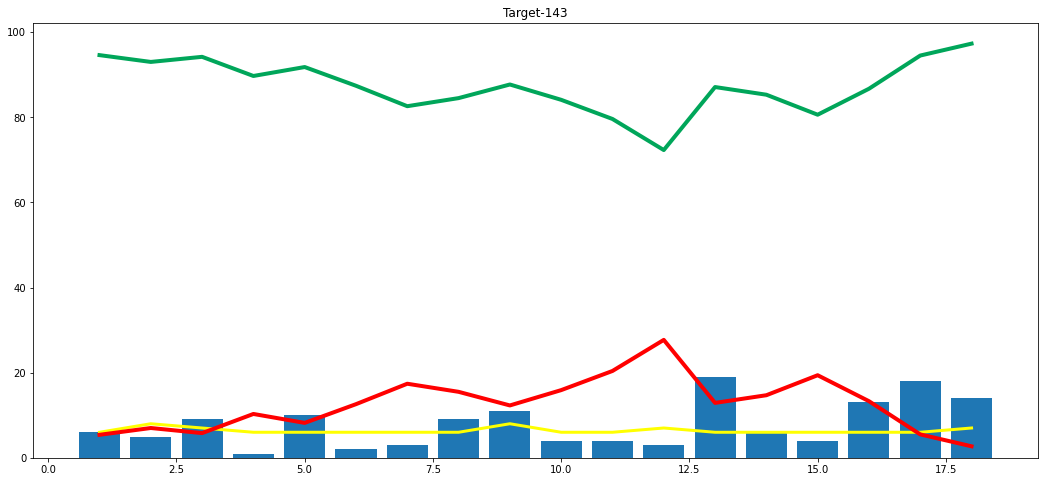

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))